<a href="https://colab.research.google.com/github/AyaSerageldin/Supply-Chain-Analysis/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

Saving DataCoSupplyChainDataset.xlsx to DataCoSupplyChainDataset.xlsx


In [2]:
import pandas as pd

#READ THE DATASET INTO PANDAS DATAFRAME#
File_Name= 'DataCoSupplyChainDataset.xlsx'
df=pd.read_excel('DataCoSupplyChainDataset.xlsx')

EDA

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
#DISPLAY THE SIZE OF TEH DATASET#
df.size

9567507

In [5]:
#DISPLAY THE SHAPE OF THE DATASET#
df.shape

(180519, 53)

In [32]:
#DISPLAY THE FIRST FIVE RECORDS OF TEH DATASET#
df.head(2)


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Customer City,Customer Country,...,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Name,Product Price,shipping date (DateOrders),Shipping Mode,Year
0,DEBIT,3,4,91,315,Advance shipping,0,73,Caguas,Puerto Rico,...,91,Southeast Asia,Java Occidental,COMPLETE,1360,Smart watch,328,2018-02-03 22:56:00,Standard Class,2018
1,TRANSFER,5,4,-249,311,Late delivery,1,73,Caguas,Puerto Rico,...,-249,South Asia,Rajastán,PENDING,1360,Smart watch,328,2018-01-18 12:27:00,Standard Class,2018


In [7]:
print(df.dtypes)


Type                                     object
Days for shipping (real)                  int64
Days for shipment (scheduled)             int64
Benefit per order                       float64
Sales per customer                      float64
Delivery Status                          object
Late_delivery_risk                        int64
Category Id                               int64
Category Name                            object
Customer City                            object
Customer Country                         object
Customer Email                           object
Customer Fname                           object
Customer Id                               int64
Customer Lname                           object
Customer Password                        object
Customer Segment                         object
Customer State                           object
Customer Street                          object
Customer Zipcode                        float64
Department Id                           

DATA PREPROCESSING

In [8]:
#CHECK FOR MISSING VALUES#
print(df.isnull().sum())

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [9]:
#DROP UNNECESSARY AND REDUNDENT COLUMNS#


df.drop(['Customer Fname','Customer Lname','Customer Email','Customer Password',
         'Customer Zipcode', 'Customer Street','Product Status',
         'Product Image','Category Name','Order Zipcode','Department Name',
         'Order Customer Id','Product Category Id','Order Item Cardprod Id',
         'Product Description']
        ,axis=1,inplace=True)

#CHECK FOR NULL VALUES AGAIN#
print(df.isnull().sum())

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Customer City                    0
Customer Country                 0
Customer Id                      0
Customer Segment                 0
Customer State                   0
Department Id                    0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
order date (DateOrders)          0
Order Id                         0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Id                    0
Order Item Product Price         0
Order Item Profit Ratio          0
Order Item Quantity              0
Sales                            0
Order Item Total    

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180519 non-null  object        
 1   Days for shipping (real)       180519 non-null  int64         
 2   Days for shipment (scheduled)  180519 non-null  int64         
 3   Benefit per order              180519 non-null  float64       
 4   Sales per customer             180519 non-null  float64       
 5   Delivery Status                180519 non-null  object        
 6   Late_delivery_risk             180519 non-null  int64         
 7   Category Id                    180519 non-null  int64         
 8   Customer City                  180519 non-null  object        
 9   Customer Country               180519 non-null  object        
 10  Customer Id                    180519 non-null  int64         
 11  

In [11]:
#Check For duplication#
print(df.duplicated().sum())

0


In [12]:
#SIZE OFOF THE DATASET AFTER REDUNDENT COLUMNS OMISSION#
df.size

6859722

In [13]:
#CHECK DIMENSIONS OF THE DATASET AFTER REDUNDENT COLUMNS OMISSION#
df.shape

(180519, 38)

In [14]:
#STATISTICAL ANALYSIS OF THE NUMERICAL DATA IN THE DATASET#
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Department Id,Latitude,Longitude,...,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Card Id,Product Price,shipping date (DateOrders)
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,5.443460,29.719955,-84.915675,...,90260.000000,141.232550,0.120647,2.127638,203.772096,183.107609,21.974989,692.509764,141.232550,2016-06-16 05:45:23.202433024
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,2.000000,-33.937553,-158.025986,...,1.000000,9.990000,-2.750000,1.000000,9.990000,7.490000,-4274.979980,19.000000,9.990000,2015-01-03 00:00:00
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,4.000000,18.265432,-98.446312,...,45130.500000,50.000000,0.080000,1.000000,119.980003,104.379997,7.000000,403.000000,50.000000,2015-09-25 06:59:00
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,5.000000,33.144863,-76.847908,...,90260.000000,59.990002,0.270000,1.000000,199.919998,163.990005,31.520000,627.000000,59.990002,2016-06-15 08:32:00
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,7.000000,39.279617,-66.370583,...,135389.500000,199.990005,0.360000,3.000000,299.950012,247.399994,64.800003,1004.000000,199.990005,2017-03-04 21:29:00
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,12.000000,48.781933,115.263077,...,180519.000000,1999.989990,0.500000,5.000000,1999.989990,1939.989990,911.799988,1363.000000,1999.989990,2018-02-06 22:14:00
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,1.629246,9.813646,21.433241,...,52111.490959,139.732492,0.466796,1.453451,132.273077,120.043670,104.433526,336.446807,139.732492,NaN


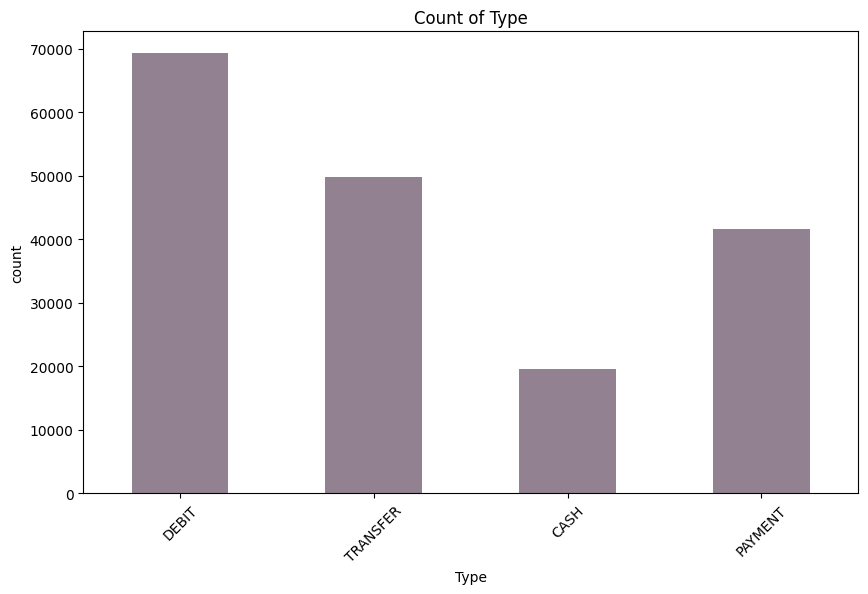

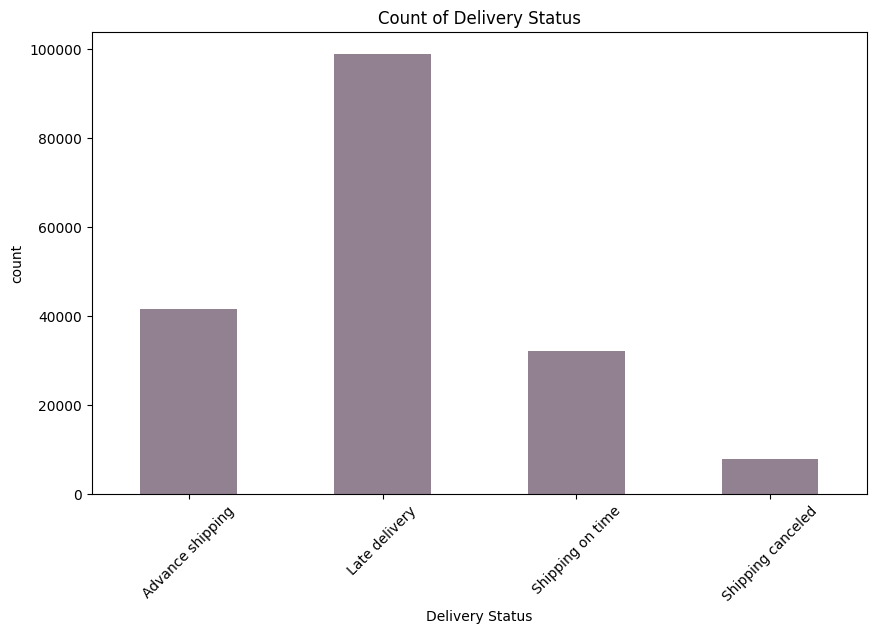

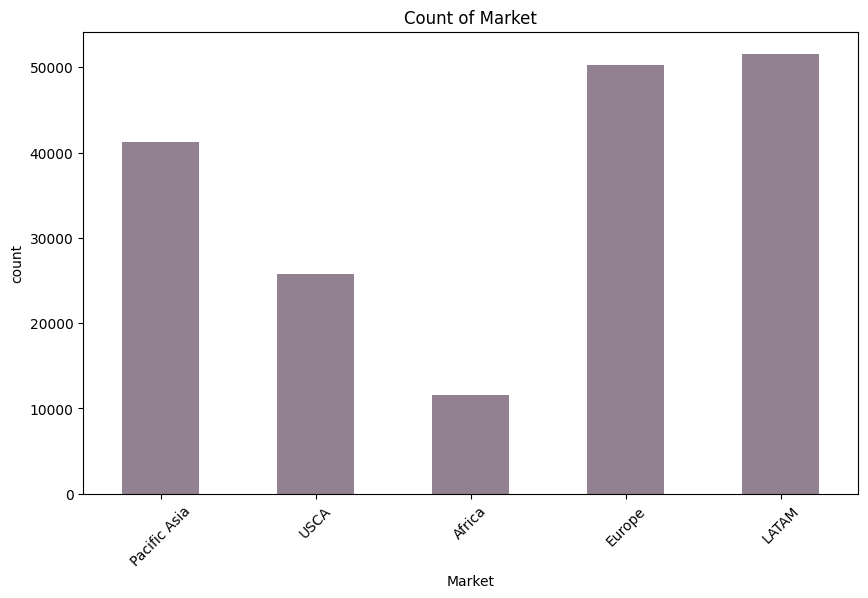

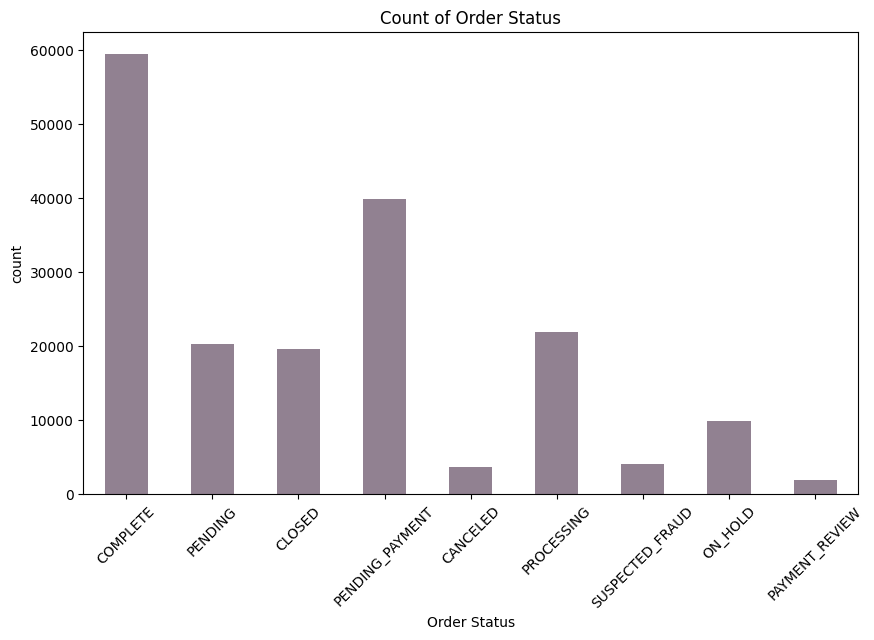

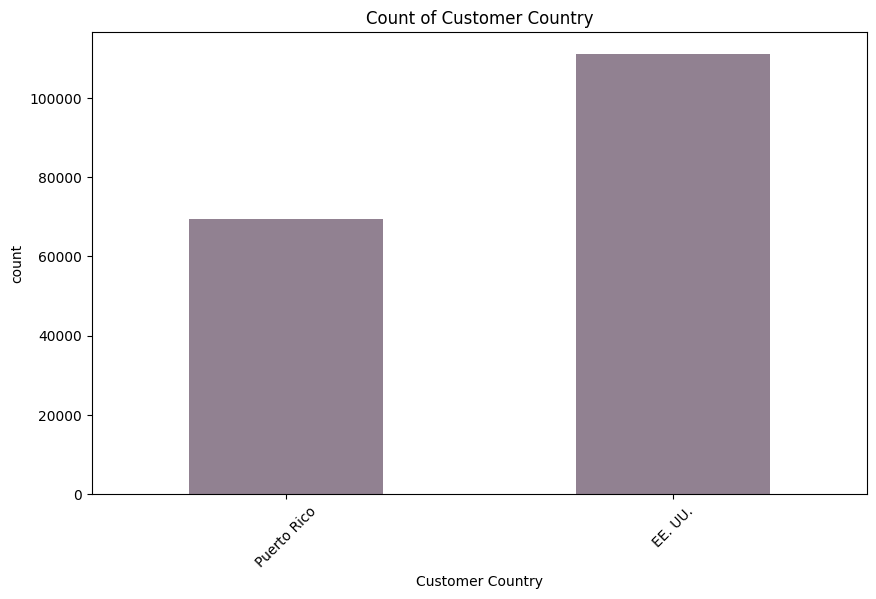

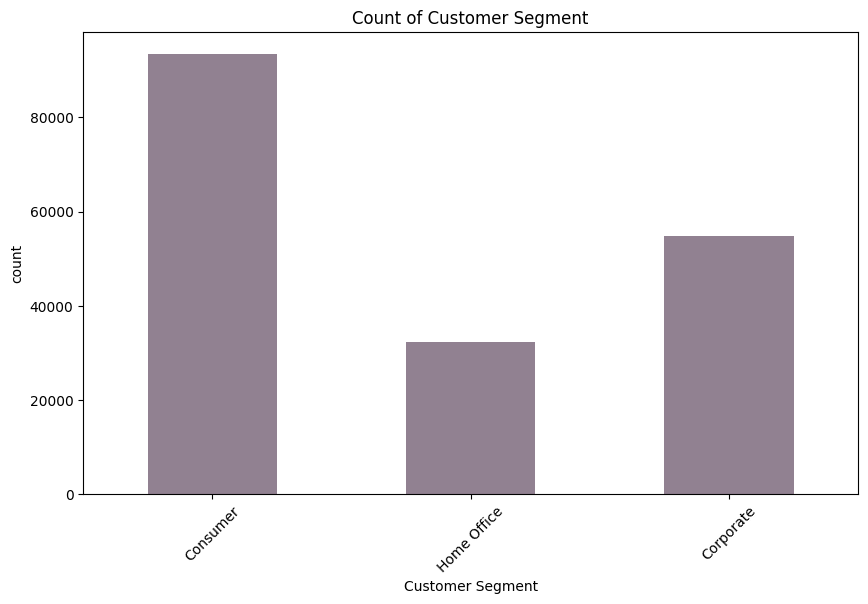

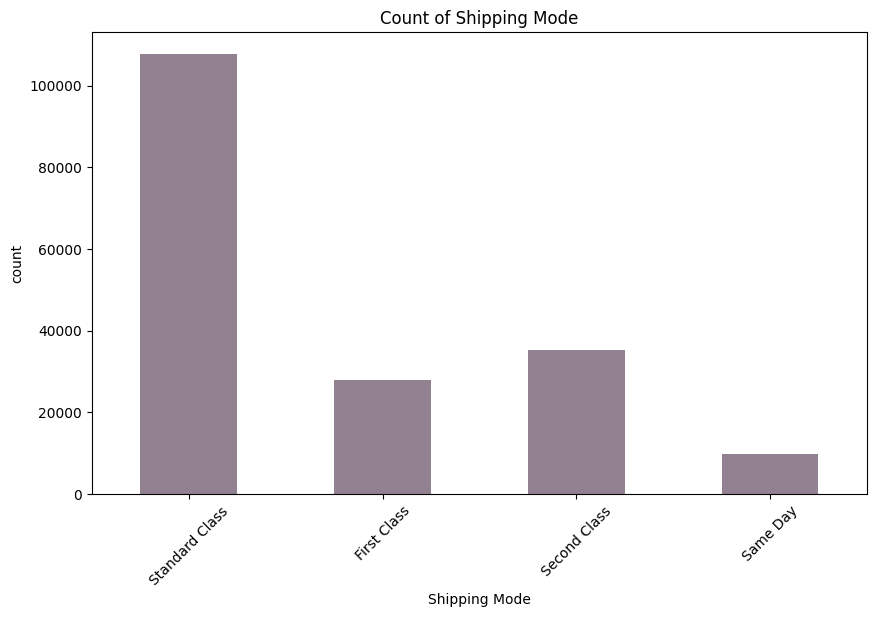

In [15]:
#THE BELOW CODE DISPLAYS GRAPHS THE NUMBER OF OCCURENCES OF CATEGORICAL FEATURES#

categorical_columns = ["Type","Delivery Status","Market", "Order Status", "Customer Country","Customer Segment","Shipping Mode"]

for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df, color='#947e94',width=0.5)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()

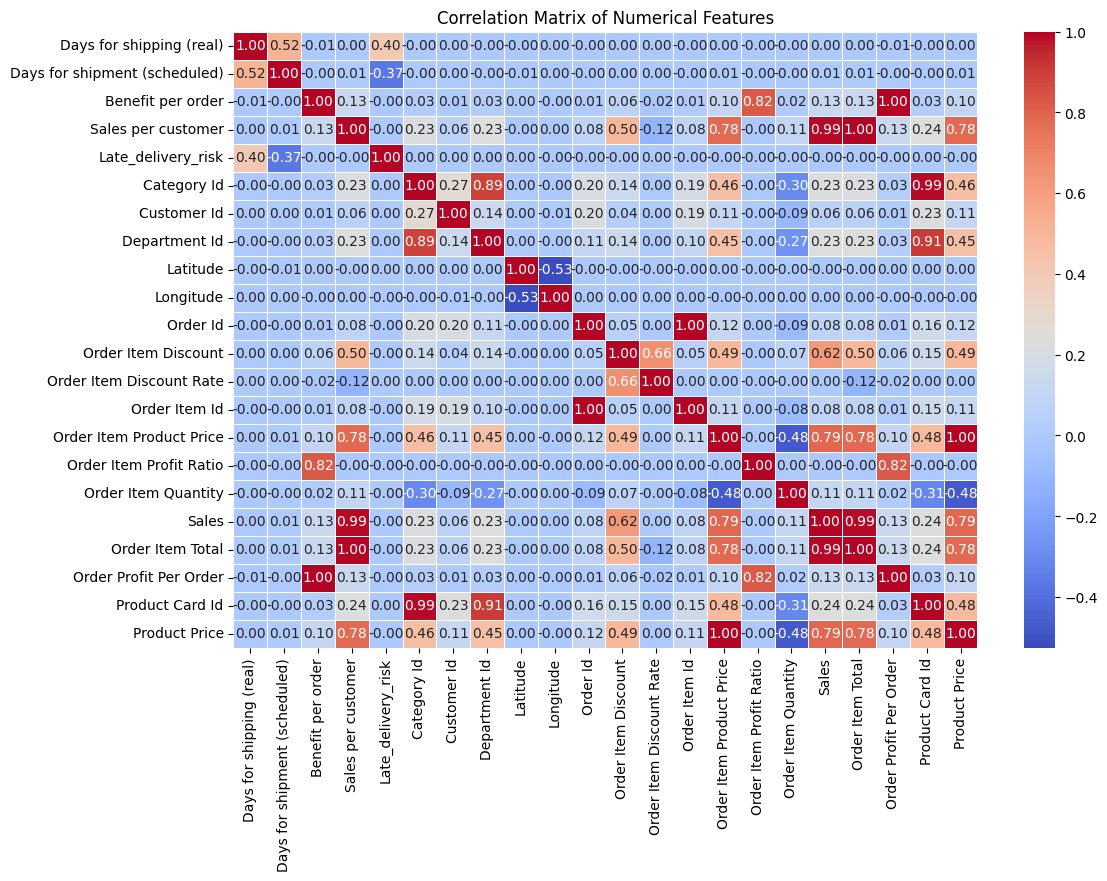

In [16]:
#Correlation Matrix of Numerical Features#

numeric_df = df.select_dtypes(include=['number'])

correlation_matrix=numeric_df.corr()

correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt='.2f', linewidths=0.7)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [17]:
#ENSURE DATES ARE IN TEH RIGHT FORMATS#
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'], format='%m/%d/%Y %H:%M', errors='coerce')
df['shipping date (DateOrders)'] = pd.to_datetime(df['shipping date (DateOrders)'], format='%m/%d/%Y %H:%M', errors='coerce')


   Year  Order Item Total
0  2015        11,089,544
1  2016        11,055,997
2  2017        10,610,910
3  2018           297,952


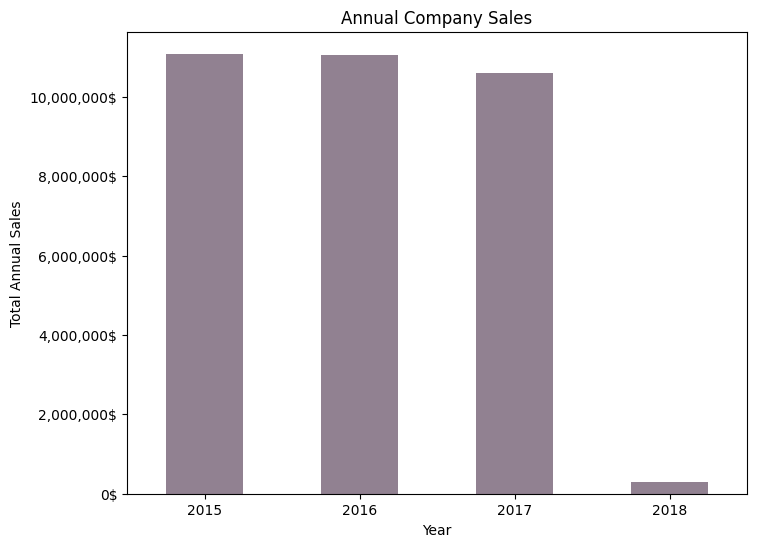

In [18]:
from datetime import date
#DISPLAY COMPANY ANNUAL COMPANY SALES#
df['Year']=df['order date (DateOrders)'].dt.year
Grouped_Data = df.groupby('Year').agg({'Order Item Total':'sum'}).reset_index()
pd.options.display.float_format = '{:,.0f}'.format

print(Grouped_Data)

from matplotlib.ticker import FuncFormatter

def currency_format(x, pos):
    return f'{x:,.0f}'+'$'

plt.figure(figsize=(8, 6))
sns.barplot(x='Year', y='Order Item Total', data=Grouped_Data,color='#947e94',width=0.5)
plt.title('Annual Company Sales')
plt.xlabel('Year')
plt.ylabel('Total Annual Sales')

plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_format))
plt.show()



         Market  Order Item Total
0        Africa         2,061,679
1        Europe         9,769,198
2         LATAM         9,235,762
3  Pacific Asia         7,434,263
4          USCA         4,553,500


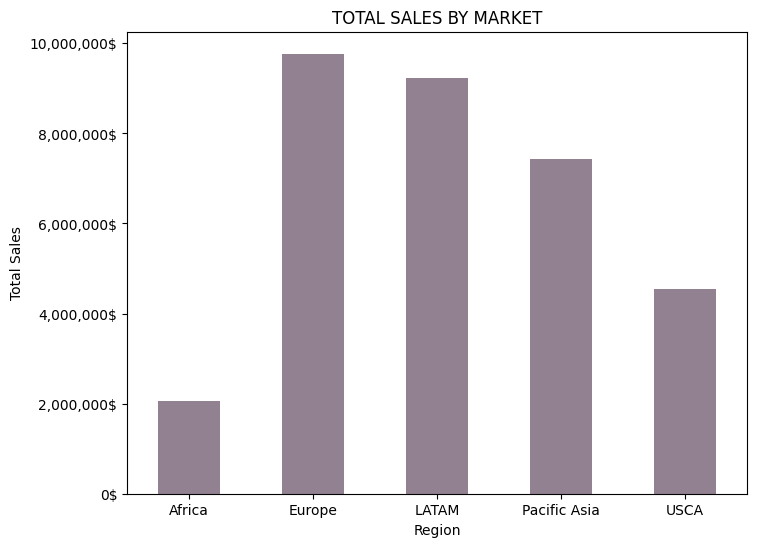

In [19]:
#SALES PER MARKET#

# Corrected code for the bar plot
Market = df['Market']
Grouped_Data = df.groupby('Market').agg({'Order Item Total': 'sum'}).reset_index()
pd.options.display.float_format = '{:,.0f}'.format

# Display the grouped data
print(Grouped_Data)

plt.figure(figsize=(8, 6))
sns.barplot(x='Market', y='Order Item Total', data=Grouped_Data, color='#947e94', width=0.5)
plt.title('TOTAL SALES BY MARKET')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_format))
plt.show()

In [20]:
df.dtypes

,0
Type,object
Days for shipping (real),int64
Days for shipment (scheduled),int64
Benefit per order,float64
Sales per customer,float64
Delivery Status,object
Late_delivery_risk,int64
Category Id,int64
Customer City,object
Customer Country,object


<Axes: >

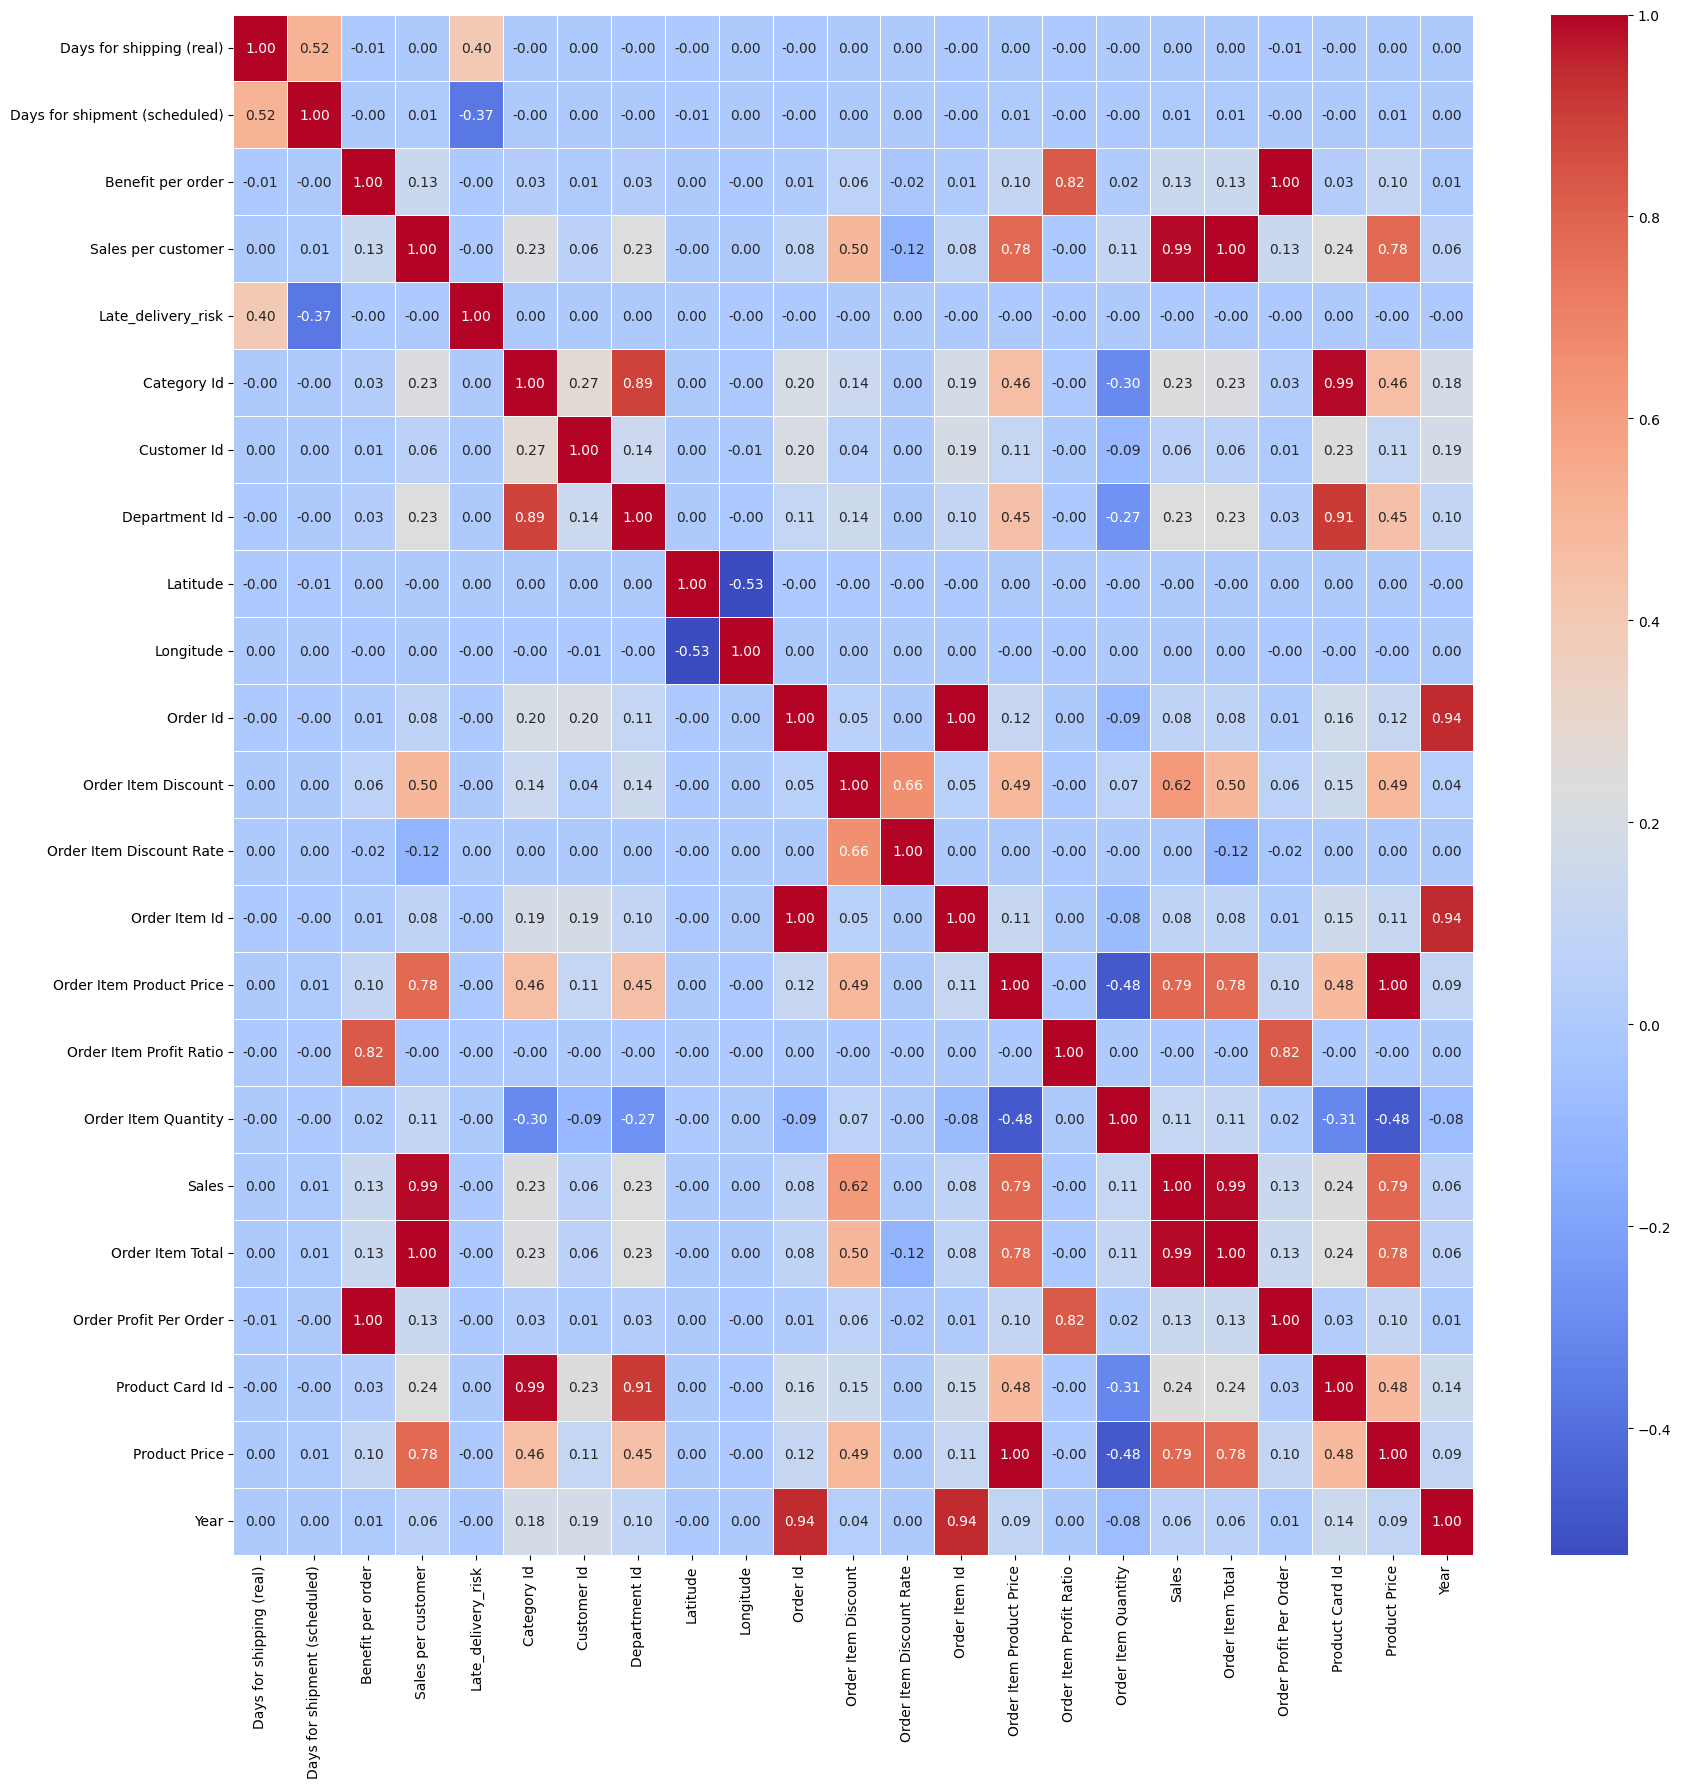

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

#Select only numeric columns from the dataframe
numeric_df = df.select_dtypes(include=['number'])

correlation_matrix=numeric_df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)



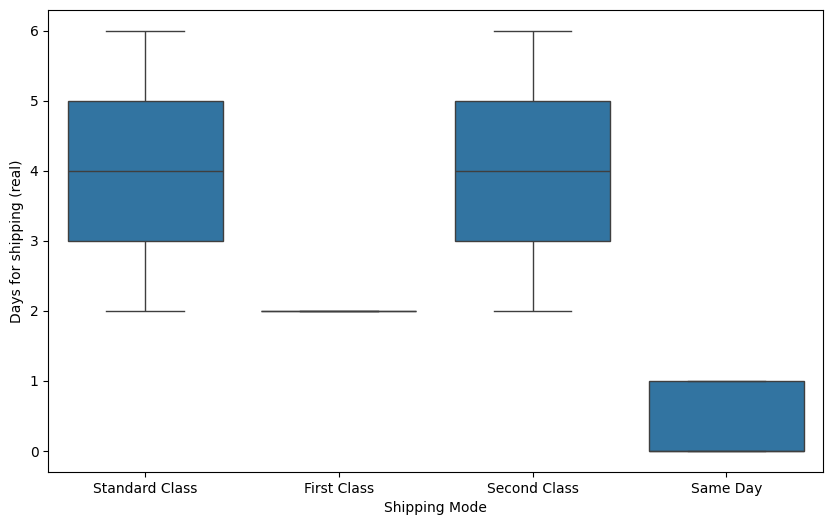

In [22]:
#Days For Shipment VS Shipment Mode#
plt.figure(figsize=(10, 6))
sns.boxplot(x='Shipping Mode', y='Days for shipping (real)', data=df)
plt.show()

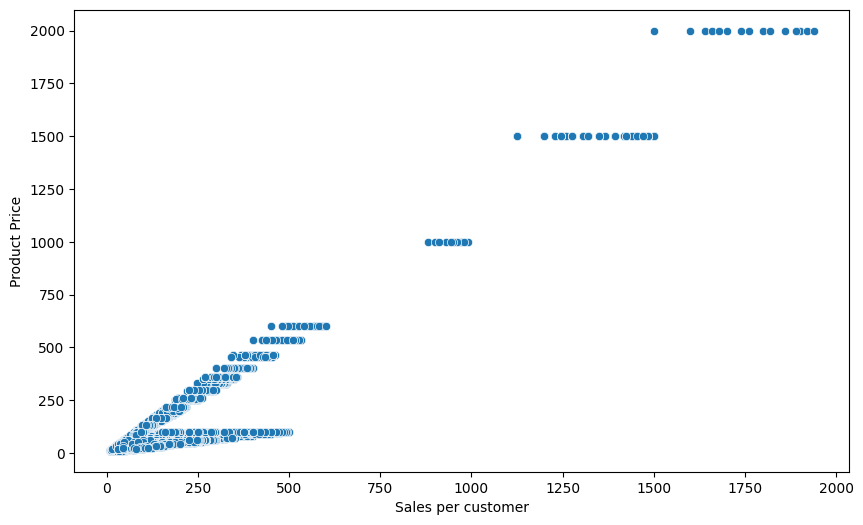

In [23]:
#SALES PER CUSTOMER VS PRODUCT PROCE#
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales per customer', y='Product Price', data=df)
plt.show()

RANDOM FOREST

In [24]:
#PREDICT CUSTOMER DEMAND#
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


X = df[['Benefit per order','Order Item Discount','Product Price',
        'Order Item Discount', 'Order Item Discount Rate']]
Y = df['Order Item Quantity']


In [25]:
print(X.shape,Y.shape)

(180519, 5) (180519,)


In [26]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Customer City',
       'Customer Country', 'Customer Id', 'Customer Segment', 'Customer State',
       'Department Id', 'Latitude', 'Longitude', 'Market', 'Order City',
       'Order Country', 'order date (DateOrders)', 'Order Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Product Card Id', 'Product Name', 'Product Price',
       'shipping date (DateOrders)', 'Shipping Mode', 'Year'],
      dtype='object')

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=500, max_depth=10, random_state=42)

rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=500, random_state=42)

In [28]:
y_pred = rf_model.predict(X_test)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180519 non-null  object        
 1   Days for shipping (real)       180519 non-null  int64         
 2   Days for shipment (scheduled)  180519 non-null  int64         
 3   Benefit per order              180519 non-null  float64       
 4   Sales per customer             180519 non-null  float64       
 5   Delivery Status                180519 non-null  object        
 6   Late_delivery_risk             180519 non-null  int64         
 7   Category Id                    180519 non-null  int64         
 8   Customer City                  180519 non-null  object        
 9   Customer Country               180519 non-null  object        
 10  Customer Id                    180519 non-null  int64         
 11  

In [30]:
# Calculate errors
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MAE = np.mean(np.abs(y_pred - y_test))
MSE = np.mean((y_pred - y_test) ** 2)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {MAE:.2f}")
print(f"Root Mean Squared Error: {RMSE:.2f}")
print(f"R-squared: {R2:.2f}")

Mean Absolute Error: 0.14
Root Mean Squared Error: 0.34
R-squared: 0.94


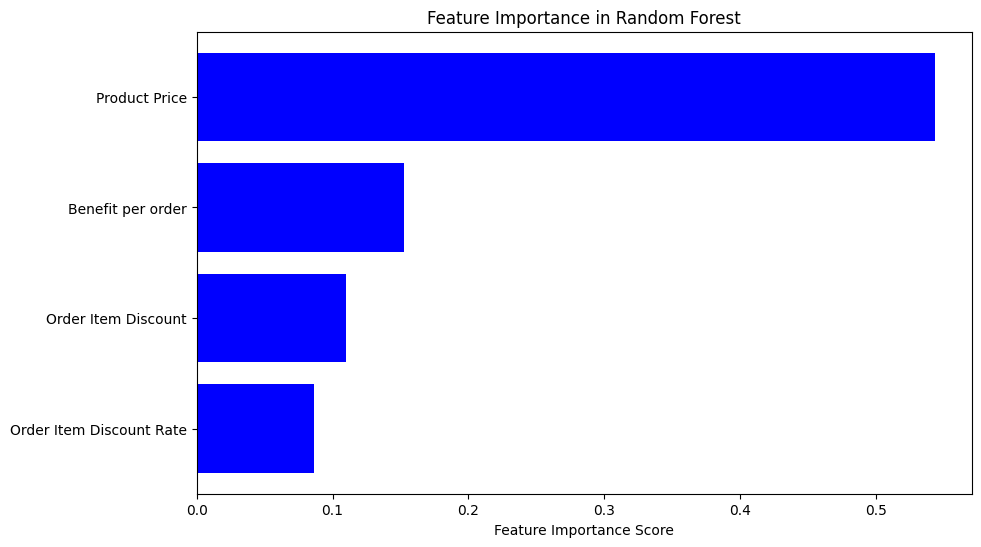

In [31]:
feature_importance = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], feature_importance[sorted_idx], color='blue')
plt.xlabel("Feature Importance Score")
plt.title("Feature Importance in Random Forest")
plt.show()